In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing data
train_df = pd.read_csv("drive/My Drive/rossmann-store-sales/train.csv")
store_df = pd.read_csv("drive/My Drive/rossmann-store-sales/store.csv")
test_df = pd.read_csv("drive/My Drive/rossmann-store-sales/test.csv")


#EDA

##A close look at our data

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Let's check for null values

In [ ]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
train_df.isna().sum

<bound method DataFrame.sum of          Store  DayOfWeek   Date  ...  Promo  StateHoliday  SchoolHoliday
0        False      False  False  ...  False         False          False
1        False      False  False  ...  False         False          False
2        False      False  False  ...  False         False          False
3        False      False  False  ...  False         False          False
4        False      False  False  ...  False         False          False
...        ...        ...    ...  ...    ...           ...            ...
1017204  False      False  False  ...  False         False          False
1017205  False      False  False  ...  False         False          False
1017206  False      False  False  ...  False         False          False
1017207  False      False  False  ...  False         False          False
1017208  False      False  False  ...  False         False          False

[1017209 rows x 9 columns]>

##Cleaning our data

In [ ]:
#Merging both the Dataframes into one based on the "Store" ID
train_store=store_df.merge(train_df,on=["Store"],how="inner")
train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
#checking for the number of null values
train_store.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

There are missing values  in the columns; CompetitionOpenSinceMonth,CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval and Competition Distance-Competition Distance has less missing values and hence will be replaces with the mode

In [ ]:
#Dropping columns
train_store=train_store.drop(columns=["PromoInterval","Promo2SinceWeek","Promo2SinceYear","CompetitionOpenSinceMonth","CompetitionOpenSinceYear"])

In [ ]:
#Handling NaN
train_store["CompetitionDistance"]=train_store["CompetitionDistance"].fillna(train_store["CompetitionDistance"].mode()[0])

##Outliers

First we find the range of our data

In [ ]:
# train_store['Sales'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
# plt.xlabel("Life Expectancy", fontsize=15)
# plt.ylabel("Frequency",fontsize=15)


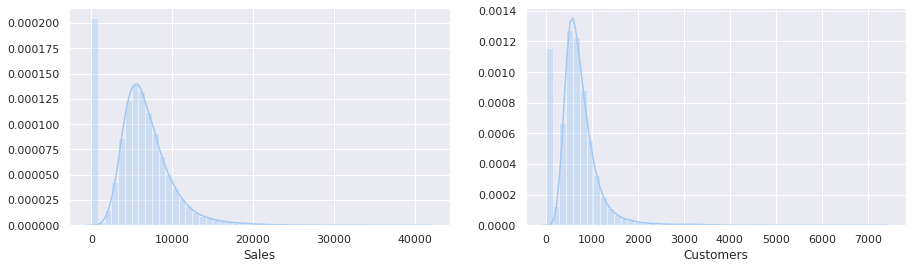

<Figure size 432x360 with 0 Axes>

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(train_store["Sales"],ax=axis1)
sns.distplot(train_store["Customers"],ax=axis2)

I decided to cap off the Customers at 3000 and Sales at 20,000

In [ ]:
train_store["Sales"]=train_store["Sales"].apply(lambda x: 20000 if x>20000 else x)
train_store["Customers"]=train_store["Customers"].apply(lambda y: 3000 if y>3000 else y)
print(max(train_store["Sales"]))
print(max(train_store["Customers"]))

20000
3000


##Extracting Time

In [ ]:
train_store["Date"]=pd.to_datetime(train_store["Date"])
train_store["Year"]=train_store["Date"].dt.year
train_store["Month"]=train_store["Date"].dt.month
train_store["Day"]=train_store["Date"].dt.day
train_store["Week"]=train_store["Date"].dt.week%4
train_store["Season"] = np.where(train_store["Month"].isin([3,4]),"Spring",np.where(train_store["Month"].isin([5,6,7,8]), "Summer",np.where(train_store["Month"].isin ([9,10,11]),"Fall",np.where(train_store["Month"].isin ([12,1,2]),"Winter","None"))))
train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season
0,1,c,a,1270.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,Summer
1,1,c,a,1270.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,3,Summer
2,1,c,a,1270.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,3,Summer
3,1,c,a,1270.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,3,Summer
4,1,c,a,1270.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,3,Summer


##Seasonality

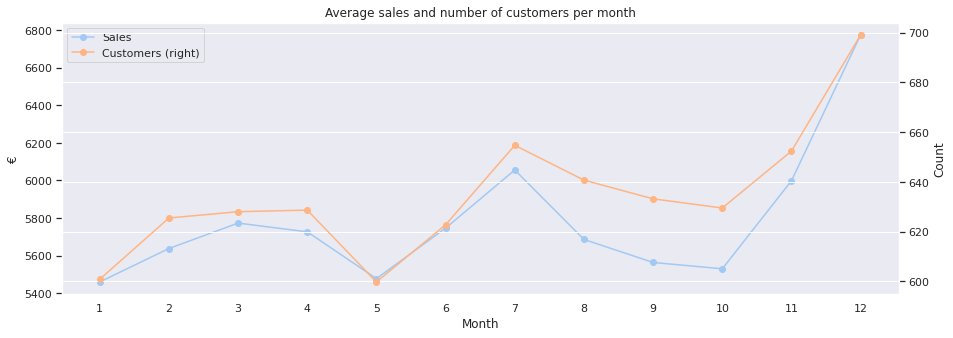

In [ ]:
ax = train_store.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
ax.set_xticks(range(1,13))
plt.title('Average sales and number of customers per month');

We can see that there is a peak in sales during month twelve (christmas season), and month 7 and during easter season in March and April

##Holidays

Checking whether State holidays affect sales and customers

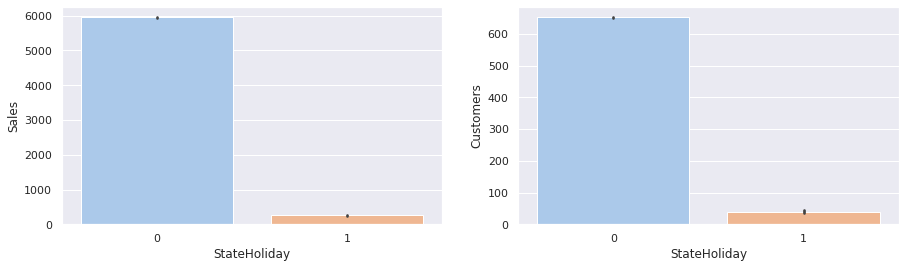

In [ ]:
train_df["StateHoliday"] = train_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test_df["StateHoliday"]     = test_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=train_df, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=train_df, ax=axis2)

Checking whether School holidays affect sales and customers

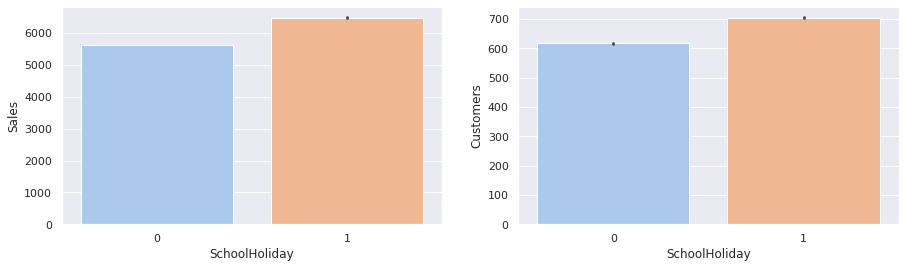

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=train_df, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=train_df, ax=axis2)

There seems to be more purchases and Customers on School holidays than on State holidays

##Correlation

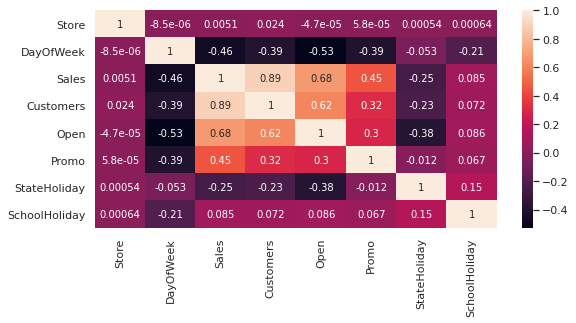

In [ ]:
fig_dims = (9, 4)
fig, ax = plt.subplots(figsize=fig_dims)
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True,ax=ax)

plt.show()

There is a positive correlation between Customers and Sales, which means that the number of sales will go up as the number of customers go up

##How Does Promos affect Sales?

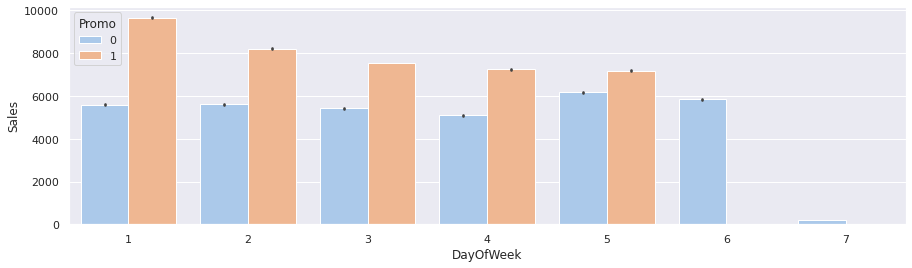

In [ ]:
plt.figure(figsize=(15,4))
sns.set(palette="pastel",color_codes=True)
sns.barplot(x="DayOfWeek",y="Sales",hue="Promo", data=train_store)

We can see that there is a much higher number of sales on days where there are promos

##Stores Open all Weekdays

<Figure size 1584x864 with 0 Axes>

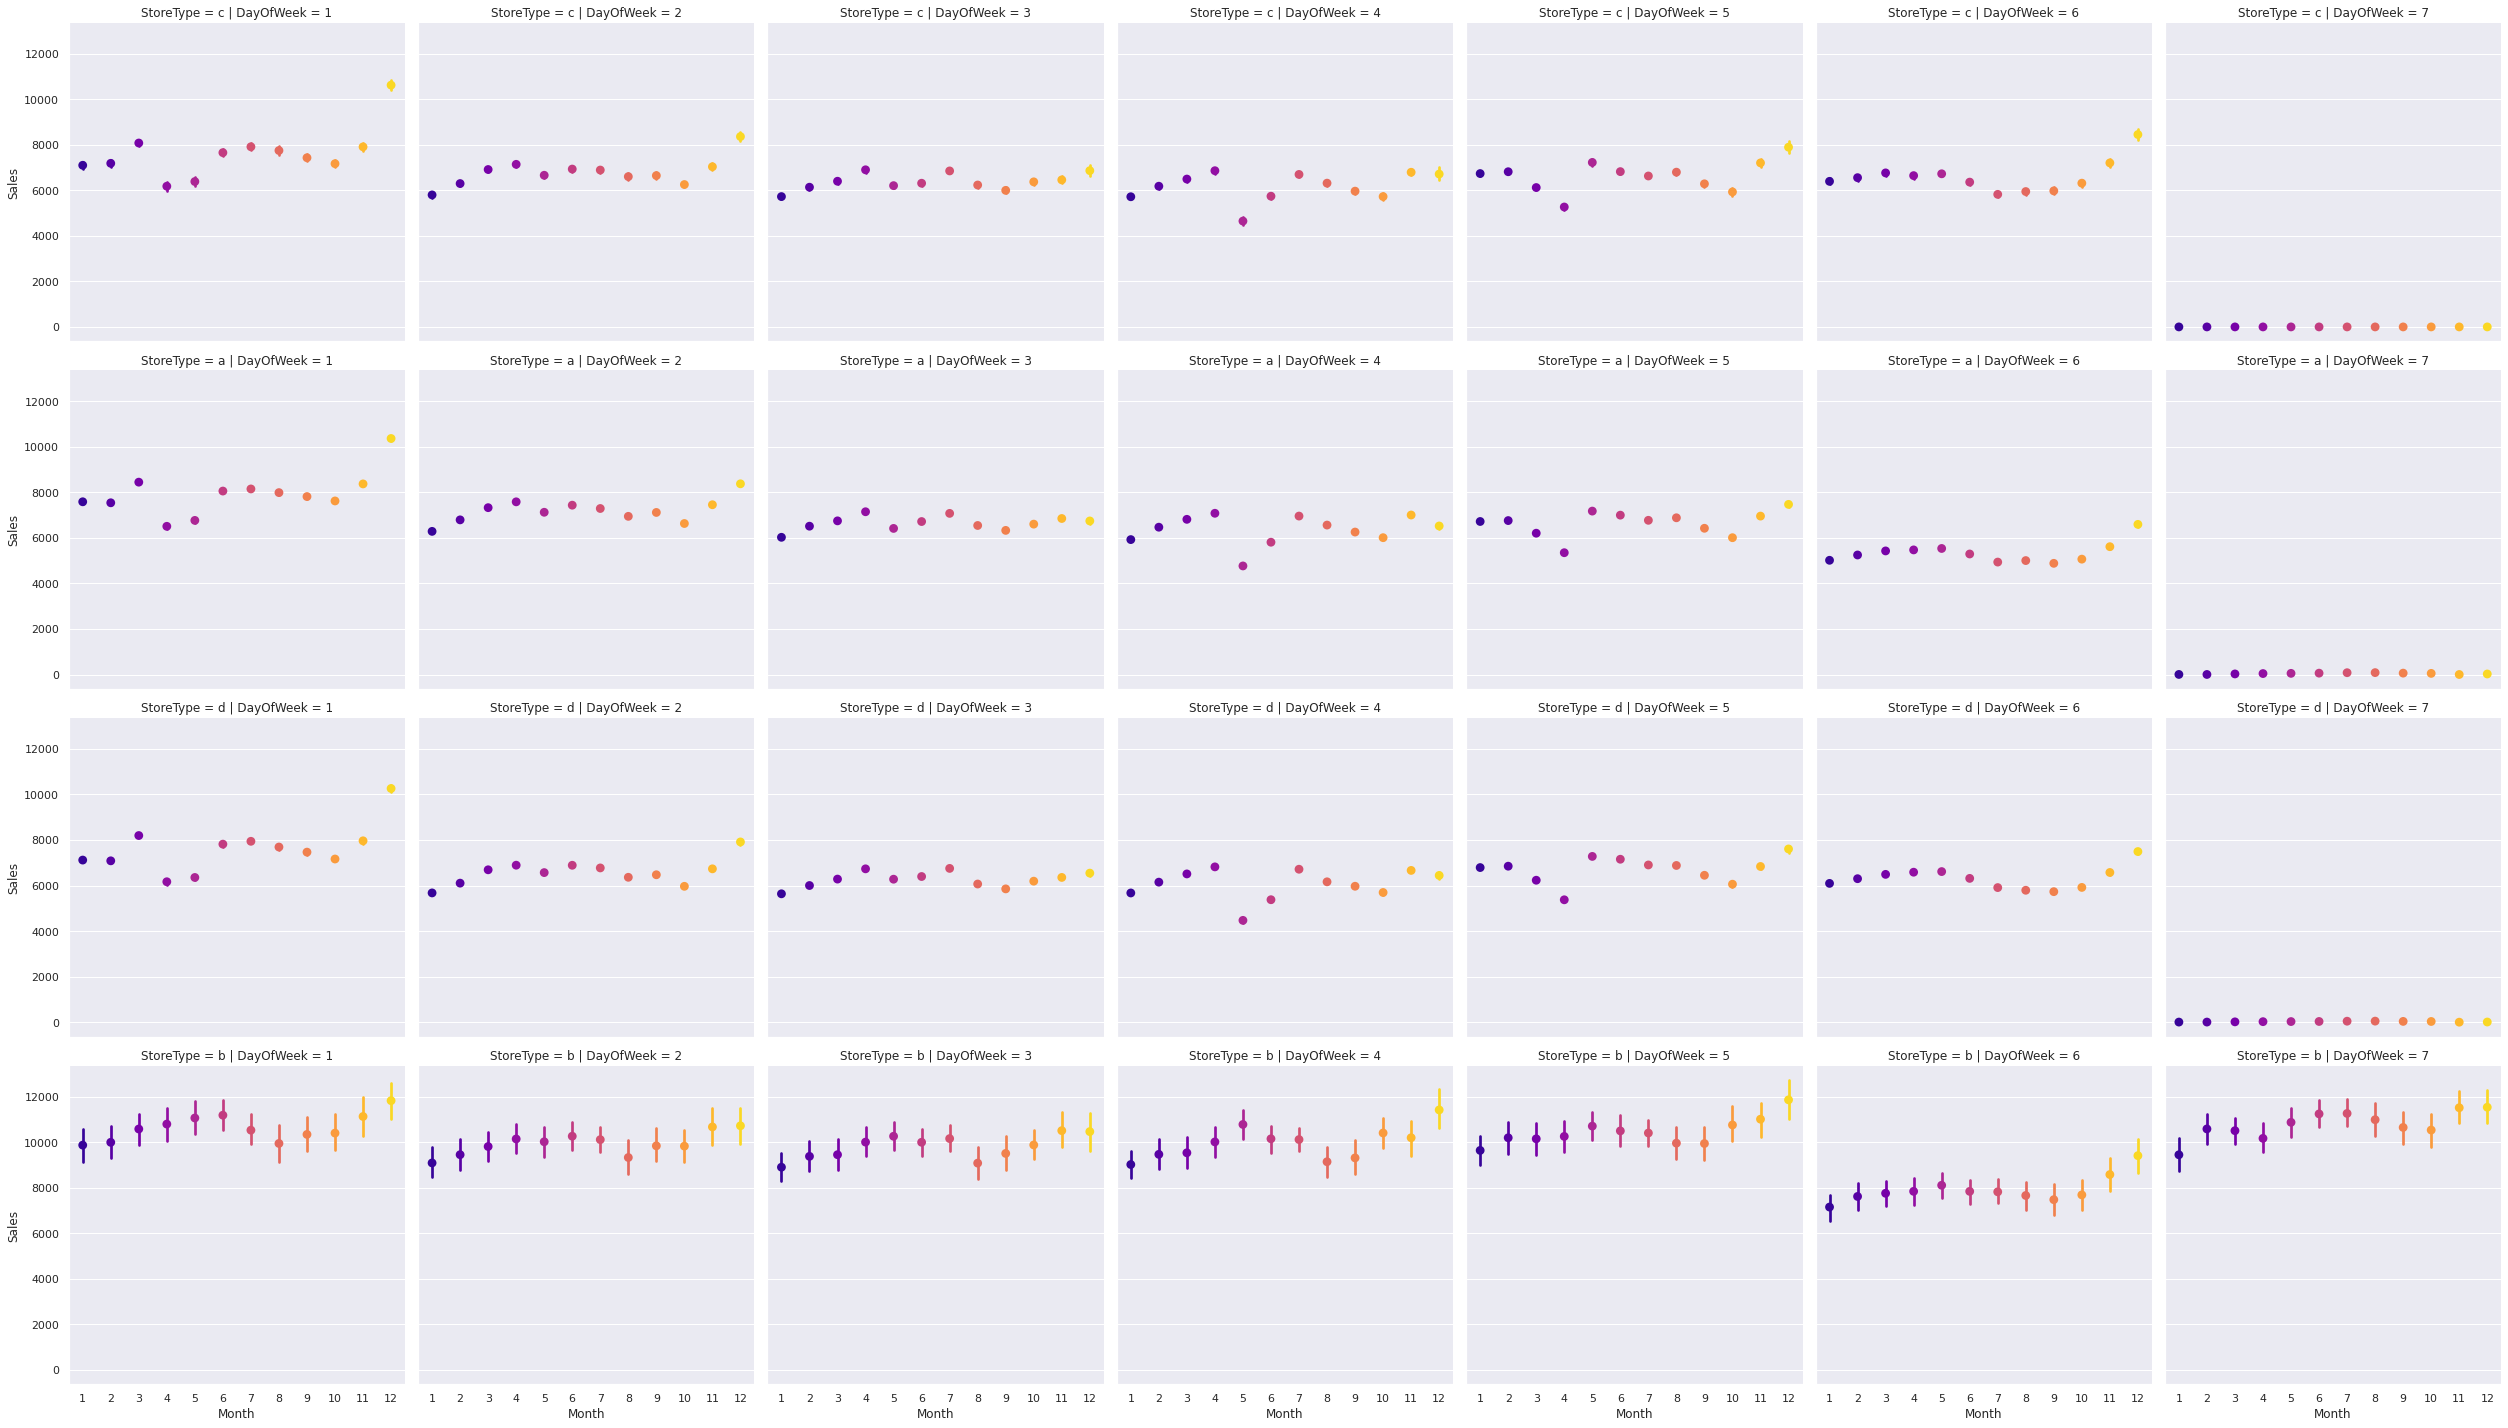

In [ ]:
plt.figure(figsize = (22, 12))
sns.factorplot(data = train_store, x = 'Month', y = 'Sales',
              col = 'DayOfWeek', # per store type in cols
              palette = 'plasma',
              row = 'StoreType', # per store type in rows
             )
#plt.savefig('weekdayopen.png')
plt.show()  

##Assortment

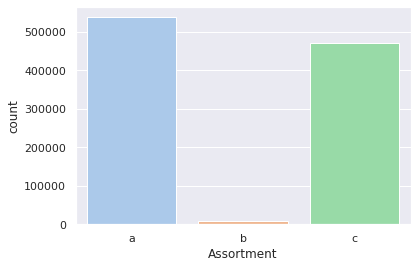

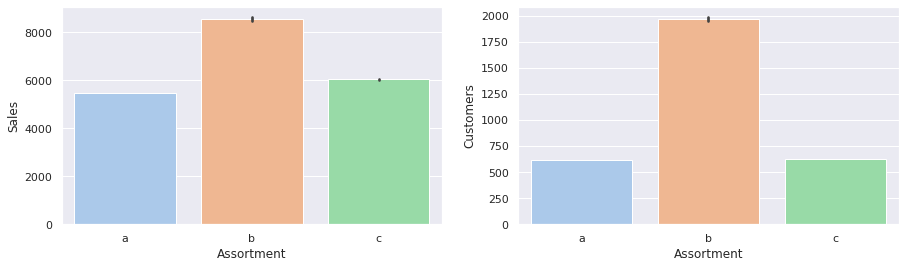

In [ ]:
sns.countplot(x='Assortment', data=train_store, order=['a','b','c'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=train_store, order=['a','b','c'], ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=train_store, order=['a','b','c'], ax=axis2)

##Competition

Checking how competition distance affects sales

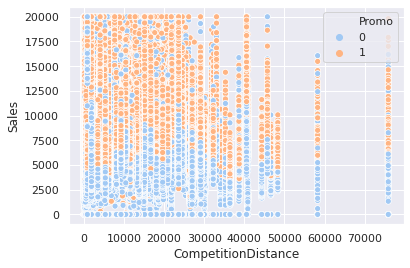

In [ ]:
g=sns.scatterplot(x="CompetitionDistance", y="Sales", hue="Promo", data=train_store)


In [ ]:
# train_store.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))


#Linear Regression to Predict Sales

##Categorical Data
The columns StoreType, Assortment, Season have char type or String type values, all of this need to converted to a numerical value before we run our model



In [ ]:
numerical_data_col=["Store","Competition Distance","Promo2","DayOfWeek","Sales","Customers","Open","SchoolHoliday","Year","Month","Day","Week"]
categorical_data_col=["StoreType","Assortment","Season"]

In [ ]:
for i in categorical_data_col:
    p=0
    for j in train_store[i].unique():
        train_store[i]=np.where(train_store[i]==j,p,train_store[i])
        p=p+1

    train_store[i]=train_store[i].astype(int)

In [ ]:
train_store["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
train_store["StateHoliday"]=np.where(train_store["StateHoliday"] == '0' ,0,1)
train_store["StateHoliday"]=train_store["StateHoliday"].astype(int)

In [ ]:
train_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season
1017204,1115,2,1,5350.0,1,6,2013-01-05,4771,339,1,0,0,1,2013,1,5,1,2
1017205,1115,2,1,5350.0,1,5,2013-01-04,4540,326,1,0,0,1,2013,1,4,1,2
1017206,1115,2,1,5350.0,1,4,2013-01-03,4297,300,1,0,0,1,2013,1,3,1,2
1017207,1115,2,1,5350.0,1,3,2013-01-02,3697,305,1,0,0,1,2013,1,2,1,2
1017208,1115,2,1,5350.0,1,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,2


In [ ]:
#Splitting of data
features=train_store[["Customers","Open","Promo","Assortment","SchoolHoliday","StoreType","Week","Month"]]
features=preprocessing.scale(features)
target=train_store["Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(features,target)

In [ ]:
target.dtypes

dtype('int64')

In [ ]:
features.dtype

dtype('float64')

In [ ]:
model1=LinearRegression()
model1.fit(X_train,Y_train)
print(model1.score(X_test,Y_test))

0.8604367673968916


In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))

##Predict Sales using Facebook Prophet

In [ ]:
df = pd.read_csv("drive/My Drive/rossmann-store-sales/train.csv",
                       low_memory = False)
#lets only have open stores with sells
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]
# sales for the store number 1 (StoreType C)
sales = df[df.Store==1].loc[:, ['Date', 'Sales']]
# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes


Date     datetime64[ns]
Sales             int64
dtype: object

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


In [ ]:
from fbprophet import Prophet
m = Prophet()
m.stan_backend.logger = None

m.fit(sales)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=6*7)
future.tail()

,ds
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


In [ ]:
future.dtypes

ds    datetime64[ns]
dtype: object

In [ ]:
forecast = m.predict(future)
 

In [ ]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5233.606850,4488.408826,6658.228271,5233.606850,5233.606850,326.914183,326.914183,326.914183,-219.648835,-219.648835,-219.648835,546.563018,546.563018,546.563018,0.0,0.0,0.0,5560.521033
1,2013-01-03,5232.198256,4322.050595,6440.164658,5232.198256,5232.198256,108.923125,108.923125,108.923125,-309.090443,-309.090443,-309.090443,418.013568,418.013568,418.013568,0.0,0.0,0.0,5341.121381
2,2013-01-04,5230.789662,4340.977103,6580.718655,5230.789662,5230.789662,240.493562,240.493562,240.493562,-54.528862,-54.528862,-54.528862,295.022424,295.022424,295.022424,0.0,0.0,0.0,5471.283224
3,2013-01-05,5229.381068,4454.729402,6653.892842,5229.381068,5229.381068,329.719248,329.719248,329.719248,150.705304,150.705304,150.705304,179.013944,179.013944,179.013944,0.0,0.0,0.0,5559.100316
4,2013-01-07,5226.563879,4460.917873,6667.871528,5226.563879,5226.563879,360.760881,360.760881,360.760881,387.931179,387.931179,387.931179,-27.170299,-27.170299,-27.170299,0.0,0.0,0.0,5587.324760


In [ ]:
predict_df= pd.DataFrame({'Store_Id': df['Store'],
                            'date':forecast['ds'], 
                          'Sales': forecast['yhat']})



In [ ]:
predict_df1=predict_df.truncate( after=822)


In [ ]:
predict_df1.tail()

,Store_Id,date,Sales
818,819.0,2015-09-07,4490.544574
819,820.0,2015-09-08,3982.072169
820,821.0,2015-09-09,3849.165261
821,822.0,2015-09-10,3746.313217
822,823.0,2015-09-11,3990.503921


In [ ]:
predict_df1.to_csv("submission1.csv", index = False)

In [ ]:
filename1 = 'prophet_model.sav'
pickle.dump(m, open(filename1, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8604367673968916


In [ ]:
!pip freeze > requirements.txt